# Simple Linear Regression

&nbsp; Regression은 ‘Regression toward the mean’의 약자이며 이를 해석하면 ‘평균으로 돌아감’을 의미한다. 따라서 회귀모형이라 함은 데이터의 대푯값을 가장 잘 설명하는 모형을 말하는 것이다. 

&nbsp; 데이터의 대푯값을 잘 설명하는 모형이란, 종속변수와 설명변수의 관계를 적절히 설명하는 계수(기울기)와 상수(절편)를 갖고 있는 모형을 뜻한다.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import torch

# Set options for printing.
# edgeitems : number of array items in summary at beginning and end of each dimension
torch.set_printoptions(edgeitems=2)

## Example Data for SLR

In [21]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.1 * t_u   # normalization
t_u.shape

torch.Size([11])

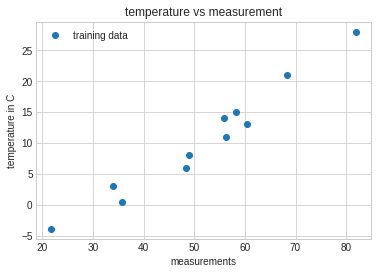

In [4]:
plt.plot(t_u, t_c, 'o',label = 'training data')
plt.xlabel('measurements')
plt.ylabel('temperature in C');
plt.title(f'temperature vs measurement')
plt.legend();

## Model and Loss Function


![image1](https://blogfiles.pstatic.net/MjAyMDAzMTNfMjkw/MDAxNTg0MDg2MjUwNjYz.1BrUslY3gAiAkix0527FyPsfEm5Z72u6romMKdV2qhog.IUe0cVQOHMFb5cZ4_4cw1OD_Z5u6TKQ6ZqgYYreB5wsg.JPEG.mint_vkkk/8.JPG?type=w2)

&nbsp; 선형회귀모형의 식은 위과 같이 정의할 수 있다. `W`는 직선의 기울기, `b`는 직선의 절편이다. 가설, 즉 우리가 만든 모형을 뜻하는 `H(x)`는 데이터 `i`에 대하여 독립변수 `x`가 종속변수 `y`와 가지는 관계를 나타내는 선, 즉 선형회귀선이다. 그러나 예측값인 `H(x)`는 데이터의 실제 값인 `y`와 어느 정도 차이(error, loss, cost)를 갖게 되는데, 이 괴리를 계산하는 것이 바로 비용함수(cost function) 혹은 손실함수(loss function)이다. 비용함수는 다음과 같이 정의된다.


![image2](https://blogfiles.pstatic.net/MjAyMDAzMTNfMjcg/MDAxNTg0MDg2MjgxMzIx.i9Xja-8R8ltWAqO-LkQXSQux04DeL6WqWuqo4YROZ8Yg.Le-1x0dC-rg4GNhgqWTMSfisBrD9resjYj2ti5evo4gg.JPEG.mint_vkkk/1.JPG?type=w2)

&nbsp; 선형회귀선과 실제 값의 차이, 즉 오차는 평균이 `0`이고 표준편차가 `σ`인 정규분포로 가정되므로 이론적으로 이들의 합은 `0`이 된다. 따라서 비용함수를 계산할 때에는 오차를 제곱한 값을 합산하여 구하게 된다. 비용함수의 값이 작으면 작을수록 모형이 데이터를 더욱 잘 반영하는 것이 일반적이며, 따라서 비용함수를 최소화하는 과정이 머신러닝에서의 학습 방법이라고 정의될 수 있다.

In [0]:
# set hypothesis as linear regression model
def model(t_u, w, b):
    return w * t_u + b


# set loss function as mean squared error
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    res = squared_diffs.mean()
    return res

## Initial Weight
&nbsp; 앞서 선형회귀모형이란 종속변수와 설명변수의 관계를 적절히 설명하는 기울기와 절편를 갖고 있는 모형이라고 말했다. 기울기와 절편을 통틀어 `가중치`라고 부른다. 임의로 설정된 모형의 초기 가중치에서부터 적절한 가중치로 수렴하도록 하는 학습함으로써 `cost`를 줄이게 된다.

In [6]:
# set initial weight
W = torch.tensor(1) #torch.ones(())
b = torch.tensor(0) #torch.zeros(())
print(W, W.shape)

tensor(1) torch.Size([])


In [7]:
# Apply data to model with initial weight

t_p = model(t_u, W, b)
print(W, b)
print(t_u)
print(t_p)

tensor(1) tensor(0)
tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])
tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])


## Initial Model(with Initial Weight) 

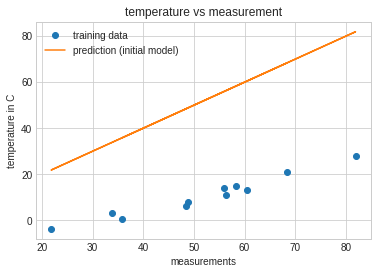

In [8]:
plt.plot(t_u, t_c, 'o', label = 'training data')
plt.plot(t_u, t_p, label = 'prediction (initial model)')
plt.xlabel('measurements')
plt.ylabel('temperature in C');
plt.title(f'temperature vs measurement')
plt.legend();

In [9]:
# calculate loss

loss = loss_fn(t_p, t_c)
loss, loss.item()

(tensor(1763.8846), 1763.8846435546875)

In [10]:
# tensor calculation examples
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}, z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1]), z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


## Gradient Descent


&nbsp;지금까지 비용함수를 최소화하는 것이 좋은 모형을 만드는 것임을 배웠다. 그렇다면 어떻게 비용함수를 최소화할 것인지가 그 다음 문제가 된다. 비용최소화를 위해서 컴퓨터는 경사하강법(Gradient descent)이라고 불리는, cost를 최소화하는 `W`와 `b`값을 찾는 알고리즘을 사용한다. 절편 `b`를 없앤 간소화된 선형회귀함수와 비용함수를 통해 Gradient Descent를 살펴보자.


![image3](https://blogfiles.pstatic.net/MjAyMDAzMTNfMjAx/MDAxNTg0MDg1ODk1MzYx.Spcd-GtKH4-tGxt6IsywZWyhYe-mm2spHTGVqyI-qdgg.TbH6Me2EjUKFf3KJnCyKQB3NbvmVe25knnolkrcoSrog.JPEG.mint_vkkk/2.JPG?type=w2)
![image4](https://blogfiles.pstatic.net/MjAyMDAzMTNfMjAx/MDAxNTg0MDg1ODk1MzYx.Spcd-GtKH4-tGxt6IsywZWyhYe-mm2spHTGVqyI-qdgg.TbH6Me2EjUKFf3KJnCyKQB3NbvmVe25knnolkrcoSrog.JPEG.mint_vkkk/2.JPG?type=w2)

&nbsp; 간소화된 식에서는 `W`만이 비용함수의 값을 결정한다. `W`를 독립변수로 한 비용함수를 그래프로 나타내면 아래와 같이 나타난다.



![image5](https://blogfiles.pstatic.net/MjAyMDAzMTNfMjgx/MDAxNTg0MDg1ODk2ODc3.3rspiG48RZmPVRzHakhLxVkKgBjQrz8779aA-A9egSIg.sHQsmG8ds5rntESk114_vAxoWRfy3ucHRtvj28lsFJwg.JPEG.mint_vkkk/3.JPG?type=w2)

&nbsp;  비용이 최소화되는 지점은 바로 비용함수의 기울기가 제일 작은 지점이다. 비용함수의 기울기가 제일 작은 지점에 도달하기 위해 컴퓨터는 지속적으로 비용함수를 `W`에 대해 편미분한 값을 바탕으로 W값을 업데이트해준다(기울기는 미분을 통해 구한다는 것을 상기하면 이해가 빠를 것이다). `W`가 업데이트될수록 비용함수의 기울기는 작아지기 때문에 새로 업데이트되는 `W`의 증감치는 갈수록 줄어들고 더욱 세밀한 최적화 과정이 가능하게 된다. `W`값의 업데이트 식은 다음 식으로 나타낼 수 있다.


![image6](https://blogfiles.pstatic.net/MjAyMDAzMTNfMjkw/MDAxNTg0MDg1ODk3MzE4.ooAQUPTFFx24k4xbYyeRS4Of51W4laQIacwm9KbyiOIg.Q6bmWRUog12vfX9toDzM1mXH3N0PjjpPpMcsui2bys4g.JPEG.mint_vkkk/4.JPG?type=w2)

&nbsp; 위 식에서 `α`는 학습률(learning rate)라고 불리며, 기울기의 업데이트값을 얼마만큼 반영할 것인가를 나타낸다. 적절한 `α`값을 찾아내는 것도 비용 최소화 과정의 중요한 부분이다.

In [0]:
# To apply Gradient Descent
# calculate the gradient of loss function
delta = 0.1

loss_rate_of_change_W = (loss_fn(model(t_u, W + delta, b), t_c) - 
                         loss_fn(model(t_u, W - delta, b), t_c)) / (2.0 * delta)

loss_rate_of_change_b = (loss_fn(model(t_u, W, b + delta), t_c) - 
                         loss_fn(model(t_u, W, b - delta), t_c)) / (2.0 * delta)

In [0]:
# update weights with gradient multiplied with learning rate
learning_rate = 1e-2

W = W - learning_rate * loss_rate_of_change_W
b = b - learning_rate * loss_rate_of_change_b

In [0]:
def loss_w(delta):
    return (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [0]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # <1>
    return dsq_diffs

In [0]:
# partial differential of the model

# for W
def dmodel_dw(t_u, w, b):
    return t_u

# for b
def dmodel_db(t_u, w, b):
    return 1.0

In [0]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])  # <1>

In [17]:
grad_fn(t_u, t_c, model(t_u, w=1, b=0), w=1, b=0)

tensor([4517.2969,   82.6000])

## Training Function

In [0]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    loss_values = []
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        loss_values.append(loss.item())
        
        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params, loss_values

## Train Model

In [25]:
params, loss = training_loop(n_epochs = 102, 
                             learning_rate = 1e-4, 
                             params = torch.tensor([1.0, 0.0]), 
                             t_u = t_u, 
                             t_c = t_c)

Epoch 1, Loss 1763.884644
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2969,   82.6000])
Epoch 2, Loss 323.090546
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4667,  16.5122])
...
Epoch 10, Loss 29.105242
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])
Epoch 11, Loss 29.104168
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5781, 3.0384])
...
Epoch 99, Loss 29.023582
    Params: tensor([ 0.2327, -0.0435])
    Grad:   tensor([-0.0533,  3.0226])
Epoch 100, Loss 29.022669
    Params: tensor([ 0.2327, -0.0438])
    Grad:   tensor([-0.0532,  3.0226])
...


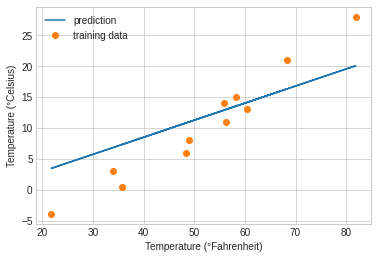

In [26]:
plt.plot(t_u.numpy(), t_p.detach().numpy(), label = 'prediction') 
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label = 'training data')
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.legend()
plt.show()

In [29]:
params, losses = training_loop(n_epochs = 3000, 
                            learning_rate = 1e-2, # increased learning rate
                            params = torch.tensor([1.0, 0.0]), 
                            t_u = t_un, 
                            t_c = t_c,
                            print_params = False)
params

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574917
Epoch 3, Loss 30.871077
...
Epoch 10, Loss 29.030487
Epoch 11, Loss 28.941875
...
Epoch 99, Loss 22.214186
Epoch 100, Loss 22.148710
...


tensor([  5.3489, -17.1980])

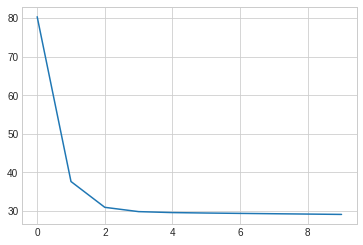

In [30]:
plt.plot(losses[:10])

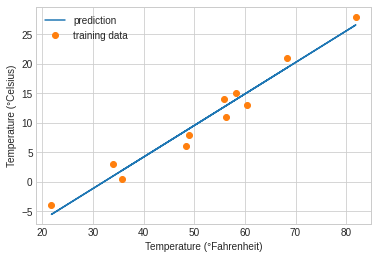

In [31]:
t_p = model(t_un, *params) 

plt.plot(t_u.numpy(), t_p.detach().numpy(), label = 'prediction')
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label = 'training data')
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.legend()
plt.show()